In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("bases_de_dados/Sivep/bases_novas/not_encoded/sivep_kids_atualizado_not_encoded_reduced_evo.csv")

In [2]:
df.drop(df[df['outcome_final_SIVEP'] == "in-hospital"].index, inplace = True)
df['Doses_vacina'] = df['Doses_vacina'].map({'zero': 'zero', 'uma':'uma', 'duas':'duas', 'tres':'tres','missing':'zero'})
df['Doses_vacina'].value_counts()

zero    20184
duas     1122
uma       779
tres      168
Name: Doses_vacina, dtype: int64

In [3]:
df['outcome_final_SIVEP'].value_counts()

discharge    20742
death         1511
Name: outcome_final_SIVEP, dtype: int64

In [170]:
df.head()

,gender,idade_anos,etnia,region,Virus_strain,dyspnea,fever,cough,odynophagia,abdominal_Pain,ageusia,anosmia,REspDistress,Oxygen_saturation_reduced,comorbidades_total,outcome_final_SIVEP,Doses_vacina,nosocomial
0,male,17.000000,Brown,Northeast,gamma,sim,nao,nao,nao,nao,nao,nao,sim,sim,0.0,death,zero,nao
1,male,16.416667,White,South,delta,nao,sim,sim,nao,nao,nao,nao,sim,sim,3.0,death,zero,nao
2,male,15.333333,Brown,Southeast,gamma,nao,sim,sim,nao,nao,nao,nao,nao,nao,0.0,death,zero,nao
3,male,14.333333,White,Southeast,gamma,sim,sim,nao,nao,nao,nao,nao,sim,nao,0.0,death,zero,nao
4,male,13.583333,White,North,omicron,sim,nao,nao,nao,nao,sim,nao,sim,sim,0.0,death,zero,nao


In [4]:
from pycaret.classification import *
s = setup(df, target = 'outcome_final_SIVEP', session_id = 123, 
          log_experiment = True, experiment_name = 'evo_1', remove_multicollinearity = True, max_encoding_ohe=100, fix_imbalance=True, fix_imbalance_method="SMOTEENN")

,Description,Value
0,Session id,123
1,Target,outcome_final_SIVEP
2,Target type,Binary
3,Target mapping,"death: 0, discharge: 1"
4,Original data shape,"(22253, 18)"
5,Transformed data shape,"(30547, 31)"
6,Transformed train set shape,"(23871, 31)"
7,Transformed test set shape,"(6676, 31)"
8,Ordinal features,11
9,Numeric features,2


In [76]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [183]:
get_config('X_transformed').tail()

,gender,idade_anos,etnia_White,etnia_Brown,etnia_Indigenous,etnia_Black,etnia_Asian,region_Southeast,region_South,region_Central_West,...,ageusia,anosmia,REspDistress,Oxygen_saturation_reduced,comorbidades_total,Doses_vacina_zero,Doses_vacina_uma,Doses_vacina_duas,Doses_vacina_tres,nosocomial
7542,1.0,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
10569,1.0,1.250000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22777,0.0,11.500000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
24031,0.0,2.166667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5261,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [182]:
best = compare_models(exclude=['lightgbm', 'ridge', 'svm', 'dummy'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9208,0.8030,0.9756,0.9415,0.9583,0.1872,0.2009,1.3800
ada,Ada Boost Classifier,0.9192,0.8011,0.9721,0.9429,0.9573,0.2053,0.2149,1.0450
lr,Logistic Regression,0.9173,0.7943,0.9686,0.9441,0.9562,0.2183,0.2246,1.5010
catboost,CatBoost Classifier,0.9083,0.7970,0.9567,0.9456,0.9511,0.2182,0.2193,7.6160
xgboost,Extreme Gradient Boosting,0.8984,0.7843,0.9429,0.9478,0.9453,0.2224,0.2230,0.9940
rf,Random Forest Classifier,0.8969,0.7556,0.9428,0.9464,0.9446,0.2050,0.2052,1.1580
lda,Linear Discriminant Analysis,0.8892,0.7866,0.9295,0.9505,0.9399,0.2330,0.2355,0.9140
knn,K Neighbors Classifier,0.8864,0.6722,0.9315,0.9458,0.9386,0.1809,0.1821,0.9830
et,Extra Trees Classifier,0.8801,0.7394,0.9213,0.9486,0.9347,0.1999,0.2032,1.2850
dt,Decision Tree Classifier,0.8475,0.6272,0.8822,0.9507,0.9151,0.1748,0.1876,0.9170


In [5]:
best = compare_models(exclude=['lightgbm', 'ridge', 'svm', 'dummy'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9208,0.8030,0.9756,0.9415,0.9583,0.1872,0.2009,1.2870
ada,Ada Boost Classifier,0.9192,0.8011,0.9721,0.9429,0.9573,0.2053,0.2149,1.0500
lr,Logistic Regression,0.9173,0.7943,0.9686,0.9441,0.9562,0.2183,0.2246,1.4580
catboost,CatBoost Classifier,0.9083,0.7970,0.9567,0.9456,0.9511,0.2182,0.2193,8.2030
xgboost,Extreme Gradient Boosting,0.8984,0.7843,0.9429,0.9478,0.9453,0.2224,0.2230,0.9850
rf,Random Forest Classifier,0.8969,0.7556,0.9428,0.9464,0.9446,0.2050,0.2052,1.1660
lda,Linear Discriminant Analysis,0.8892,0.7866,0.9295,0.9505,0.9399,0.2330,0.2355,0.9210
knn,K Neighbors Classifier,0.8864,0.6722,0.9315,0.9458,0.9386,0.1809,0.1821,0.9730
et,Extra Trees Classifier,0.8801,0.7394,0.9213,0.9486,0.9347,0.1999,0.2032,1.2340
dt,Decision Tree Classifier,0.8475,0.6272,0.8822,0.9507,0.9151,0.1748,0.1876,0.9010


In [11]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9307,0.8382,0.9842,0.9439,0.9636,0.2501,0.2771
1,0.9101,0.7956,0.9635,0.9415,0.9523,0.1677,0.1712
2,0.9211,0.8325,0.9731,0.9439,0.9583,0.2250,0.2346
3,0.9249,0.7928,0.9800,0.9418,0.9605,0.2019,0.2206
4,0.9249,0.8187,0.9766,0.9447,0.9604,0.2463,0.2596
5,0.9101,0.7972,0.9663,0.9391,0.9525,0.1320,0.1367
6,0.9204,0.8124,0.9787,0.9386,0.9582,0.1390,0.1540
7,0.9216,0.7907,0.9780,0.9404,0.9588,0.1624,0.1771
8,0.9197,0.7748,0.9752,0.9409,0.9577,0.1666,0.1781


In [12]:
evaluate_model(gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
calibrated_gbc = calibrate_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9236,0.8399,0.9731,0.9464,0.9596,0.2661,0.2751
1,0.9069,0.7959,0.9539,0.9467,0.9503,0.2290,0.2294
2,0.9217,0.8343,0.9676,0.9493,0.9584,0.2964,0.3003
3,0.9198,0.7946,0.9690,0.9462,0.9575,0.2530,0.2587
4,0.9178,0.8203,0.9649,0.9479,0.9563,0.2690,0.2721
5,0.9037,0.7972,0.9532,0.9441,0.9486,0.1913,0.1918
6,0.9127,0.8128,0.9656,0.9422,0.9537,0.1831,0.1875
7,0.9114,0.7913,0.9614,0.9445,0.9529,0.2039,0.2062
8,0.9139,0.7759,0.9656,0.9435,0.9544,0.1948,0.1990


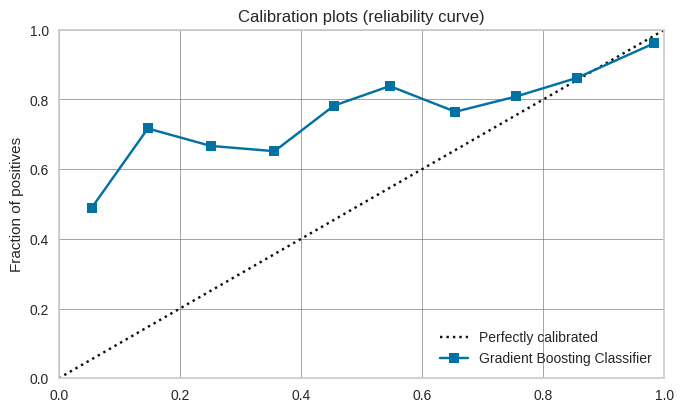

In [14]:
plot_model(calibrated_gbc, plot='calibration')

In [15]:
tuned_gbc = tune_model(gbc, choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9320,0.8270,1.0000,0.9320,0.9648,0.0000,0.0000
1,0.9320,0.7862,1.0000,0.9320,0.9648,0.0000,0.0000
2,0.9320,0.8363,1.0000,0.9320,0.9648,0.0000,0.0000
3,0.9320,0.7821,1.0000,0.9320,0.9648,0.0000,0.0000
4,0.9320,0.8135,1.0000,0.9320,0.9648,0.0000,0.0000
5,0.9320,0.7943,1.0000,0.9320,0.9648,0.0000,0.0000
6,0.9320,0.7984,1.0000,0.9320,0.9648,0.0000,0.0000
7,0.9326,0.7842,1.0000,0.9326,0.9651,0.0000,0.0000
8,0.9326,0.7380,1.0000,0.9326,0.9651,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


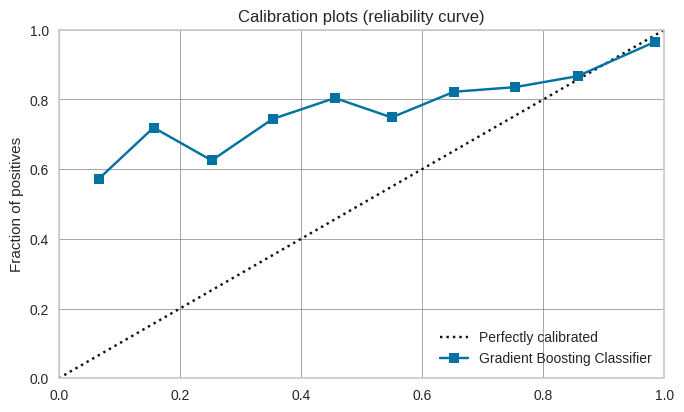

In [16]:
plot_model(tuned_gbc, plot='calibration')

In [138]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8601,0.7268,0.8601,0.7407,0.7960,-0.0009,-0.0070
1,0.8613,0.7313,0.8613,0.8041,0.7977,0.0076,0.0620
2,0.8613,0.6876,0.8613,0.8041,0.7977,0.0076,0.0620
3,0.8607,0.7428,0.8607,0.7408,0.7963,0.0000,0.0000
4,0.8607,0.7311,0.8607,0.7408,0.7963,0.0000,0.0000
5,0.8607,0.7364,0.8607,0.7408,0.7963,0.0000,0.0000
6,0.8601,0.7245,0.8601,0.7398,0.7954,0.0000,0.0000
7,0.8606,0.7410,0.8606,0.7407,0.7961,0.0000,0.0000
8,0.8612,0.6961,0.8612,0.7417,0.7970,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [23]:
boosted_gbc = ensemble_model(calibrated_gbc, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9249,0.8397,0.9738,0.9471,0.9603,0.2785,0.2878
1,0.9050,0.7957,0.9532,0.9454,0.9492,0.2094,0.2099
2,0.9230,0.8345,0.9697,0.9488,0.9591,0.2938,0.2992
3,0.9211,0.7949,0.9718,0.9451,0.9582,0.2415,0.2496
4,0.9204,0.8201,0.9683,0.9474,0.9578,0.2703,0.2752
5,0.9056,0.7983,0.9552,0.9442,0.9497,0.1962,0.1971
6,0.9172,0.8098,0.9718,0.9413,0.9563,0.1782,0.1868
7,0.9159,0.7926,0.9663,0.9448,0.9554,0.2169,0.2213
8,0.9133,0.7784,0.9649,0.9434,0.9540,0.1930,0.1969


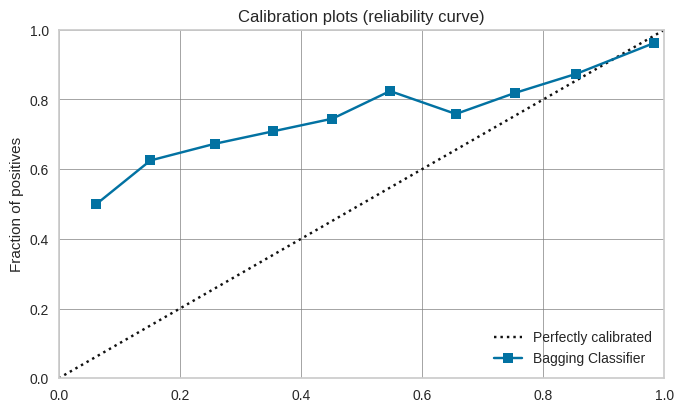

In [24]:
plot_model(boosted_gbc, plot='calibration')

In [17]:
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [18]:
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1e-06, loss='log_loss', max_depth=11,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.002, min_samples_leaf=1,
                           min_samples_split=10, min_weight_fraction_leaf=0.0,
                           n_estimators=170, n_iter_no_change=None,
                           random_state=123, subsample=0.4, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [141]:
calibrated_gbc = calibrate_model(tuned_gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8595,0.7203,0.8595,0.7567,0.7968,0.0050,0.0206
1,0.8607,0.7114,0.8607,0.7626,0.7976,0.0101,0.0477
2,0.8619,0.6909,0.8619,0.8045,0.7991,0.0152,0.0877
3,0.8607,0.7342,0.8607,0.7408,0.7963,0.0000,0.0000
4,0.8625,0.7223,0.8625,0.8050,0.8005,0.0227,0.1074
5,0.8607,0.7440,0.8607,0.7408,0.7963,0.0000,0.0000
6,0.8601,0.7106,0.8601,0.7716,0.7965,0.0067,0.0388
7,0.8594,0.7248,0.8594,0.7405,0.7956,-0.0017,-0.0099
8,0.8612,0.7020,0.8612,0.7732,0.7981,0.0068,0.0390


In [142]:
interpret_model(tuned_gbc)

TypeError: This function only supports tree based models for binary classification: xgboost, catboost, dt, et, lightgbm, rf.